# Homework 4 - Getting to know your customers

Over time, the Banking sector has dabbled into plenty of Data Science applications. The latter includes topics such as Fraud detection, risk modelling for investment, personalized marketing, managing customer data and customer segmentation, among others. The latter is a crucial topic for a bank since they can offer their products more accurately and tailor-made depending on their clients' characteristics and how probable they will consume more services from the bank.

Now, you and your team have been hired by a bank to get to know their customers. In other words, you will implement hashing and clustering techniques to extract relevant information and highlights from those clients and their transactions.

Then, let's get started!

In [28]:
import pandas as pd
from datetime import datetime
from random import randint
from tqdm import tqdm
import numpy as np
from numpy.linalg import norm
from operator import itemgetter
import matplotlib.pyplot as plt
import pickle as pkl
from scipy import stats
from sklearn import preprocessing
import six
from sklearn.decomposition import PCA

In [186]:
data = pd.read_csv("bank_transactions.csv")   # importing the dataset

In [187]:
data                                        # visualize the data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [180]:
data.info()                                                 # showing some info on the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041614 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 79.5+ MB


In [188]:
data.isna().sum()                                     # counts of rows with na

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [189]:
data.dropna(inplace=True)                                # removing na

In [178]:
data.isna().sum()                                        # check

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [190]:
data.CustomerDOB =  pd.to_datetime(data.CustomerDOB)

In [191]:
data.TransactionDate  = pd.to_datetime(data.TransactionDate)

In [192]:
pd.to_datetime(data.TransactionTime)

0         1970-01-01 00:00:00.000143207
1         1970-01-01 00:00:00.000141858
2         1970-01-01 00:00:00.000142712
3         1970-01-01 00:00:00.000142714
4         1970-01-01 00:00:00.000181156
                       ...             
1048562   1970-01-01 00:00:00.000184824
1048563   1970-01-01 00:00:00.000183734
1048564   1970-01-01 00:00:00.000183313
1048565   1970-01-01 00:00:00.000184706
1048566   1970-01-01 00:00:00.000181222
Name: TransactionTime, Length: 1041614, dtype: datetime64[ns]

In [193]:
data.TransactionTime 

0          143207
1          141858
2          142712
3          142714
4          181156
            ...  
1048562    184824
1048563    183734
1048564    183313
1048565    184706
1048566    181222
Name: TransactionTime, Length: 1041614, dtype: int64

In [194]:
def convert_time(value):
    sec = str(value % 100)
    minutes = str((value //100) %100)
    hours = str((value // 10000) %100)
    return datetime.strptime(str(hours)+":"+str(minutes)+":"+str(sec), '%H:%M:%S').time()

In [195]:
data.TransactionTime = data.TransactionTime.apply(lambda row: convert_time(row))

<AxesSubplot:>

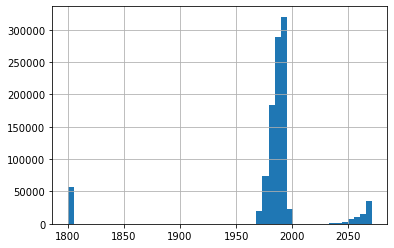

In [70]:
data.CustomerDOB.dt.year.hist(bins=50)

In [196]:
data.loc[data.CustomerDOB.dt.year > 2000,'CustomerDOB'] = data.loc[data.CustomerDOB.dt.year > 2000,'CustomerDOB']  - pd.DateOffset(years=100)

In [197]:
data.drop(data.loc[data.CustomerDOB.dt.year==1800].index,axis=0,inplace=True)

<AxesSubplot:>

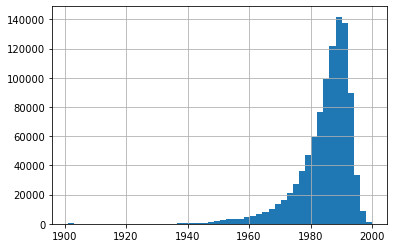

In [73]:
data.CustomerDOB.dt.year.hist(bins=50)

In [198]:
data.CustomerDOB = pd.to_datetime(data.CustomerDOB)

In [199]:
data.TransactionDate = pd.to_datetime(data.TransactionDate)

In [200]:
data.CustGender = [str(x) for x in data.CustGender]

In [201]:
data.CustLocation = [str(x) for x in data.CustLocation]

In [202]:
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0


In [203]:
data.to_pickle("processed.pkl")

## 1. Finding Similar Costumers

Companies nowadays are implementing product suggestions to provide users with things they are likely to buy. 

The process often starts by finding similar behaviours among consumers; for this task, we will focus on this part in the specific.

Here you will implement an algorithm to find the most similar match to a consumer given his bank account information. 

In particular, you will implement your version of the LSH algorithm that takes as input information about a consumer and finds people similar to the one in the study.

### 1.1 Set up the data

In [67]:
data = pd.read_pickle('processed2.pkl')

In [68]:
data.isna().sum()

CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [53]:
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0


In [54]:
newdata = data.drop(['CustomerID','TransactionID'], axis = 1)

In [55]:
newdata.index = [x for x in range(len(newdata))]

In [56]:
newdata.info

<bound method DataFrame.info of        CustomerDOB CustGender   CustLocation  CustAccountBalance  \
0       1994-10-01          F     JAMSHEDPUR            17819.05   
1       1957-04-04          M        JHAJJAR             2270.69   
2       1996-11-26          F         MUMBAI            17874.44   
3       1973-09-14          F         MUMBAI           866503.21   
4       1988-03-24          F    NAVI MUMBAI             6714.43   
...            ...        ...            ...                 ...   
985317  1990-08-04          M      NEW DELHI             7635.19   
985318  1992-02-20          M         NASHIK            27311.42   
985319  1989-05-18          M      HYDERABAD           221757.06   
985320  1978-08-30          M  VISAKHAPATNAM            10117.87   
985321  1984-05-03          M           PUNE            75734.42   

       TransactionDate TransactionTime  TransactionAmount (INR)  
0           2016-02-08        14:32:07                     25.0  
1           2016-02

In [57]:
newdata.to_pickle('newdata.pkl')

In [58]:
new_data = pd.read_pickle('newdata.pkl')

In [72]:
new_data = pd.read_pickle('processed2.pkl')

### 1.2 Fingerprint hashing

### HASH FUNCTIONS

#### Hash function implemented to create an hash value for each value in the dataframe.

In [59]:
# Hash function for datetime type
def hash_date(value):
    return int(pd.Timestamp(value).timestamp())

In [60]:
#Hash function for string type
def hash_string(value,p):
    m =2^32 -1
    a =101
    b=456
    first  = sum([ ord(x)*(p^i) for i,x in enumerate(value)])%m
    return (a* first + b)%p

In [61]:
#Hash function for float type
def hash_float(value):
    return int(value)

In [62]:
#Collective Hash function, checks on the type of value parameter and applies the right hash function
def my_hash (value,p):
    if not isinstance(value,int):
            if isinstance(value,datetime): 
                value  = hash_date(value)
            elif isinstance(value,str): 
                value = hash_string(value,p)
            elif isinstance(value,float): 
                value = hash_float(value)
    return value

#### Initialization of the parameter for the MinHash algorithm

In [63]:
p  = 125539 #prime number
N  = 100  #number of permutations
max_val = 2^32-1 #value used for the randomization in the creation of the permutations
permutations = [(randint(0,max_val), randint(0,max_val)) for _ in range(N)] # Creations of the permutations

### MINHASH

#### MinHash function: creates a minHash signature for the customer given as input.

The minHash signature will be a vector of length N as the number of permutations used in the algorithm

In [64]:
def minHash(customer,p,permutations):
    vec  = [float(np.inf) for _ in range(len(permutations))]

    for i,val in customer.items():
        
        val =  my_hash(val,p)# CReate Hash value
        
        for perm_i,perm_vals in enumerate(permutations): #Applies N permutations to every hash value of the customer
            
            a,b = perm_vals

            output = (a*val + b)%p
       
            if(vec[perm_i] > output ):
                vec[perm_i] = output

    return vec # Hash Signature for the given customer

#### Create 'minhash' column for the bank_transactions.csv dataset

In [9]:
new_data['minhash']  = [minHash(new_data.loc[i],p,permutations) for i in tqdm(range(len(new_data)))]

100%|██████████| 985322/985322 [10:46<00:00, 1524.39it/s]


In [191]:
new_data.minhash

NameError: name 'new_data' is not defined

In [ ]:
query =  pd.read_pickle('query.pkl')

In [ ]:
query.index = [ i for i in range(len(query))]

#### Create 'minhash' column for the query.csv dataframe

In [ ]:
query['minhash']  = [minHash(query.loc[i],p,permutations) for i in tqdm(range(len(query)))]

In [ ]:
query.head().minhash

### LSH 

In [ ]:
# LSH algorithm implementation

# query is a boolean parameter: 
# if True it will insert as the index of the df row in the bucket: 'q<index>'. 
# If False it will insert in the bucket just the integer representing the row index. 
# band: bandwidth parameter, sets the number of subdivisions in the minHash signature of the rows in df
# my_dict: dictionary representing the buckets
def LSH(my_dict,df,query,band):
    for i,hash_vec in enumerate(df.minhash):
        step = len(hash_vec)//band
        j = 0
        idx = 0
        while(j<len(hash_vec)):
            sub_vec = hash_vec[j:j+step]
            sep = '-'
            key  = sep.join([str(x) for x in sub_vec])+','+str(idx)
            if key not in my_dict.keys():
                my_dict[key]  = []
            if( query):
                my_dict[key].append('q'+str(i))
            else:
                my_dict[key].append(i)
            j += step
            idx +=1
    return my_dict

#### Function that finds the right buckets for every row passed in the new_data parameter

In [ ]:
def find_bucket(my_dict,new_data,band):
    for i,hash_vec in enumerate(new_data.minhash):
        step = len(hash_vec)//band
        j = 0
        idx = 0
        while(j<len(hash_vec)):
            sub_vec = hash_vec[j:j+step]
            sep = '-'
            key  = sep.join([str(x) for x in sub_vec])+','+str(idx)
            if key in my_dict.keys():
                my_dict[key].append(i)
            j += step
            idx +=1
    return my_dict

#### Find the most similar Customer in the bank_transaction.csv file for the given Customer query

In [ ]:
# query is the entire row in the query.csv file with his minHash signature
# df is the dataframe where we want to find the most similar, df comes with all the minHash signature for every Customer in the dataset
# band: bandwidth parameter, sets the number of subdivisions in the minHash signature of the rows in df
#Changing the value of the bandwidth will create more matches, but the most similar will be unaffected
def check_similar(query,band,df):
    query_i= 'q'+str(query.index[0])
    buckets = {} # Initialization of the dictionary that will represents the buckets for the given query row
    LSH(buckets,query,True,band) # LSH  algorithm: fills the dictionary creating the right buckets for the given query row
    find_bucket(buckets,df,band) #find_bucket:  function to insert in the right buckets the index of every the df row 
    
    matches = [ x for v,x in buckets.items()]
   
    matches  = [x for x in list(chain.from_iterable(matches)) if x != query_i and 'q' not in str(x)]
    c = Counter(matches)
    if( not c.most_common()):
        return 'NA'
    return c.most_common()[0][0] #Return the index in the df dataframe corresponding to the most similar Customer

#### Find most similar for every row in query.csv in the bank_transaction.csv dataset

In [ ]:
matches =[]

In [ ]:
for i in tqdm(query.index):
    if(i > 31):
        matches.append(check_similar(query[i:i+1],4,new_data))

In [ ]:
matches

In [ ]:
query_results  = pd.DataFrame(columns=['query_index','match_df_index'])

In [ ]:
query_results['match_df_index'] = matches
query_results['query_index']  = query.index

In [ ]:
query_results

## 2. Grouping customers together!

Now we will deal with clustering algorithms that will provide groups of clients which are similar among them.

### 2.1 Getting your data + feature engineering

2.1 Access to the data found in this dataset (it is the same dataset from the previous question 1.1).

In [32]:
newdata = pd.read_pickle("processed.pkl")

In [33]:
newdata

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0


In [206]:
newdata.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [207]:
newdata.index = [x for x in range(len(newdata))]

2.2 Sometimes, the features (variables, fields) are not given in a dataset but can be created from it. The previous step is known as feature engineering. For example, the original dataset has several transactions done by the same customer. Then, we suggest you to group data by the client (using CustomerId) and, based on it, create the following new features for each CustomerId:

####   a) Number of transactions

In [214]:
newdata["NumberTransactions"] = newdata.groupby('CustomerID')["TransactionID"].transform("count")

In [209]:
newdata2["NumberTransactions"] = newdata.groupby('CustomerID')["TransactionID"].count()

#### b) Number of transactions with a balance bigger than 100 UDS   da fare

In [219]:
newdata["CustAccountBalance (USD)"] = newdata["CustAccountBalance"] * 0.012244201

In [220]:
newdata["N_trans_bal>100"] = newdata[newdata["CustAccountBalance (USD)"]>100].groupby('CustomerID')["TransactionID"].transform('count')

In [221]:
newdata["N_trans_bal>100"].fillna(0, inplace = True)

#### c) Average amount of transactions

In [222]:
newdata["AverageAmount (INR)"] = newdata.groupby('CustomerID')["TransactionAmount (INR)"].transform("mean")

#### d) Average Balance

In [223]:
newdata["AverageBalance (INR)"] = newdata.groupby('CustomerID')["CustAccountBalance"].transform("mean")

#### e) Average difference between the balance and the transaction amount for each customer (this is mainly known in the banking world as    utilisation).

In [224]:
newdata["Utilization"] = newdata["AverageBalance (INR)"] - newdata["AverageAmount (INR)"]

#### f) Most common gender of the customer

In [ ]:
result = newdata.groupby(['CustomerID'])['CustGender'].agg(pd.Series.mode)

In [226]:
newdata["MostCommonGender"] = "NA"

In [227]:
newdata['MostCommonGender'] = newdata.CustomerID.apply(lambda x: result[x])

#### g) Most frequent location of the customer

In [228]:
result2 = newdata.groupby(['CustomerID'])['CustLocation'].agg(pd.Series.mode)

In [229]:
newdata["MostFreqLocation"] = "NA"

In [230]:
newdata["MostFreqLocation"] = newdata.CustomerID.apply(lambda x: result2[x])

2.1.3 Consider at least 20 additional features that can be generated for each CustomerId. Describe each of them and why you believe they will be helpful. Moreover, add it to the previous dataset (the one with seven features).

####  TransactionAmount (USD)

In [231]:
newdata["TransactionAmount (USD)"] = newdata["TransactionAmount (INR)"] * 0.012244201 

#### AverageAmount (USD)

In [232]:
newdata["AverageAmount (USD)"] = newdata.groupby('CustomerID')["TransactionAmount (USD)"].transform("mean")  

#### CustAccountBalance (USD)

In [233]:
newdata["CustAccountBalance (USD)"] = newdata["CustAccountBalance"] * 0.012244201

#### AverageBalance (USD)

In [234]:
newdata["AverageBalance (USD)"] = newdata["AverageBalance (INR)"] * 0.012244201

#### MaxAmountTrans (USD)

In [235]:
newdata["MaxAmountTrans (USD)"] = newdata.groupby('CustomerID')["TransactionAmount (USD)"].transform("max")  

#### MinAmountTrans (USD)

In [236]:
newdata["MinAmountTrans (USD)"] = newdata.groupby('CustomerID')["TransactionAmount (USD)"].transform("min") 

#### MaxBalance (USD)

In [237]:
newdata["MaxBalance (USD)"] = newdata.groupby('CustomerID')["CustAccountBalance (USD)"].transform("max") 

#### MinBalance (USD)

In [238]:
newdata["MinBalance (USD)"] = newdata.groupby('CustomerID')["CustAccountBalance (USD)"].transform("min") 

#### CustomerAge

In [239]:
newdata['CustomerAge'] = ((pd.to_datetime('today')-newdata.CustomerDOB)/np.timedelta64(1,'Y')).round(0)
newdata['CustomerAge'] = newdata['CustomerAge'].astype(int)

#### NumberMorningTransactions

In [240]:
newdata["N_morningTransactions"] = newdata[(newdata["TransactionTime"] >= datetime.strptime("06:00:00", '%H:%M:%S').time()) & (newdata["TransactionTime"] < datetime.strptime("12:00:00", '%H:%M:%S').time())].groupby('CustomerID')["TransactionID"].transform('count')

In [241]:
newdata["N_morningTransactions"].fillna(0, inplace = True)

#### NumberAfternoonTransaction

In [242]:
newdata["N_afternoonTransactions"] = newdata[(newdata["TransactionTime"] >= datetime.strptime("12:00:00", '%H:%M:%S').time()) & (newdata["TransactionTime"] < datetime.strptime("18:00:00", '%H:%M:%S').time())].groupby('CustomerID')["TransactionID"].transform('count')

In [243]:
newdata["N_afternoonTransactions"].fillna(0, inplace = True)

#### NumberEveningTransaction

In [244]:
newdata["N_eveningTransactions"] = newdata[(newdata["TransactionTime"] >= datetime.strptime("18:00:00", '%H:%M:%S').time()) & (newdata["TransactionTime"] <= datetime.strptime("23:59:59", '%H:%M:%S').time())].groupby('CustomerID')["TransactionID"].transform('count')

In [245]:
newdata["N_eveningTransactions"].fillna(0, inplace = True)

#### NumberNigthTransaction

In [246]:
newdata["N_nigthTransactions"] = newdata[(newdata["TransactionTime"] >= datetime.strptime("00:00:00", '%H:%M:%S').time()) & (newdata["TransactionTime"] < datetime.strptime("08:00:00", '%H:%M:%S').time())].groupby('CustomerID')["TransactionID"].transform('count')

In [247]:
newdata["N_nigthTransactions"].fillna(0, inplace = True)

#### Amount percentage of Balance (USD)

In [248]:
newdata['Amount_percentage_of_Balance (USD)'] = newdata['TransactionAmount (USD)'] / newdata['CustAccountBalance (USD)']*100 

#### Number of Negative Transaction

In [250]:
newdata["NumberNegativeTransaction"] = newdata[newdata["TransactionAmount (INR)"]>newdata["CustAccountBalance"]].groupby('CustomerID')["TransactionID"].transform('count')

In [251]:
newdata["NumberNegativeTransaction"].fillna(0, inplace = True)

#### Number of Transaction > Half Balance

In [252]:
newdata["NTransaction>HalfBalance"] = newdata[newdata["TransactionAmount (INR)"]>(newdata["CustAccountBalance"]/2)].groupby('CustomerID')["TransactionID"].transform('count')

In [253]:
newdata["NTransaction>HalfBalance"].fillna(0, inplace = True)

#### Recency

The recency factor is based on the notion that the more recently a customer has made a purchase with a company, the more likely they will continue to keep the business and brand in mind for subsequent purchases. This information can be used to remind recent customers to revisit the business soon to continue meeting their purchase needs.

In [254]:
newdata['DaysSinceTransaction'] = (pd.to_datetime('today') - newdata['TransactionDate'])/np.timedelta64(1, 'D')
newdata['DaysSinceTransaction'] = newdata['DaysSinceTransaction'] - newdata['DaysSinceTransaction'].min()

In [255]:
newdata = newdata.rename(columns = {'DaysSinceTransaction' : 'Recency'})

#### Number of Transactions bigger than 1/10 of the balance

In [256]:
newdata["N_trans_>one_tenth_bal"] = newdata[newdata["TransactionAmount (USD)"]> (newdata["CustAccountBalance (USD)"])/10].groupby('CustomerID')["TransactionID"].transform('count')

In [257]:
newdata["N_trans_>one_tenth_bal"].fillna(0,inplace = True)

#### Date of First Transaction

We create a new feature that contains for each CustomerID the date of the first transaction. It can be useful to recognize the accounts that have been in operation the longest.

In [258]:
newdata['DateFirstTransaction'] = newdata.groupby("CustomerID")["TransactionDate"].transform("min")

In [ ]:
#### Number of Transaction per Month

In [10]:
newdata

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),NumberTransactions,...,N_morningTransactions,N_afternoonTransactions,N_eveningTransactions,N_nigthTransactions,Amount_percentage_of_Balance (USD),NumberNegativeTransaction,NTransaction>HalfBalance,Recency,DateFirstTransaction,N_trans_>one_tenth_bal
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,1,...,0.0,1.0,0.0,0.0,0.140299,0.0,0.0,305.0,2016-02-08,0.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,1,...,0.0,1.0,0.0,0.0,1233.061316,1.0,1.0,305.0,2016-02-08,1.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,1,...,0.0,1.0,0.0,0.0,2.567913,0.0,0.0,305.0,2016-02-08,0.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,2,...,0.0,1.0,0.0,0.0,0.237737,0.0,0.0,305.0,2016-02-08,0.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,1,...,0.0,0.0,1.0,0.0,26.249436,0.0,0.0,305.0,2016-02-08,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985317,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0,1,...,0.0,0.0,1.0,0.0,10.464704,0.0,0.0,82.0,2016-09-18,1.0
985318,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0,1,...,0.0,0.0,1.0,0.0,1.684277,0.0,0.0,82.0,2016-09-18,0.0
985319,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0,2,...,0.0,0.0,1.0,0.0,0.347227,0.0,0.0,82.0,2016-09-15,0.0
985320,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0,1,...,0.0,0.0,1.0,0.0,9.883503,0.0,0.0,82.0,2016-09-18,0.0


#### MedianAmount (USD)

In [259]:
newdata["MedianAmount (USD)"] = newdata.groupby('CustomerID')["TransactionAmount (USD)"].transform("median") 

#### VarianceAmount 

In [260]:
newdata["VarianceAmount (USD)"] = newdata.groupby('CustomerID')["TransactionAmount (USD)"].transform("var") 
newdata["VarianceAmount (USD)"].fillna(0, inplace = True)

#### MedianBalance (USD)

In [261]:
newdata["MedianBalance (USD)"] = newdata.groupby('CustomerID')["CustAccountBalance (USD)"].transform("median") 

#### VarianceBalance 

In [262]:
newdata["VarianceBalance"] = newdata.groupby('CustomerID')["CustAccountBalance (USD)"].transform("var") 
newdata["VarianceBalance"].fillna(0, inplace = True)

In [27]:
newdata.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)', 'NumberTransactions',
       'CustAccountBalance (USD)', 'N_trans_bal>100', 'AverageAmount (INR)',
       'AverageBalance (INR)', 'Utilization', 'MostCommonGender',
       'MostFreqLocation', 'TransactionAmount (USD)', 'AverageAmount (USD)',
       'AverageBalance (USD)', 'MaxAmountTrans (USD)', 'MinAmountTrans (USD)',
       'MaxBalance (USD)', 'MinBalance (USD)', 'CustomerAge',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'Amount_percentage_of_Balance (USD)', 'NumberNegativeTransaction',
       'NTransaction>HalfBalance', 'Recency', 'DateFirstTransaction',
       'N_trans_>one_tenth_bal', 'MedianAmount (USD)', 'VarianceAmount (USD)',
       'MedianBalance (USD)', 'VarianceBalance', 'AverageRecency'],
      dtype='object')

#### AverageRecency

In [263]:
newdata["AverageRecency"] = newdata.groupby('CustomerID')["Recency"].transform("mean")  

#### AverageCustomerAge

In [264]:
newdata["AverageCustomerAge"] = newdata.groupby('CustomerID')["CustomerAge"].transform("mean")  

#### MedianCustomerAge

In [265]:
newdata["MedianCustomerAge"] = newdata.groupby('CustomerID')["CustomerAge"].transform("median")  

#### VarianceCustomerAge

In [266]:
newdata["VarianceCustomerAge"] = newdata.groupby('CustomerID')["CustomerAge"].transform("var")  
newdata["VarianceCustomerAge"].fillna(0, inplace = True)

In [141]:
newdata.CustomerID.unique

<bound method Series.unique of 0         C5841053
1         C2142763
2         C4417068
3         C5342380
4         C9031234
            ...   
985317    C8020229
985318    C6459278
985319    C6412354
985320    C6420483
985321    C8337524
Name: CustomerID, Length: 985322, dtype: object>

In [267]:
newdata

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),NumberTransactions,...,N_trans_>one_tenth_bal,DateFirstTransaction,MedianAmount (USD),VarianceAmount (USD),MedianBalance (USD),VarianceBalance,AverageRecency,AverageCustomerAge,MedianCustomerAge,VarianceCustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,1,...,0.0,2016-02-08,0.306105,0.000000,218.180030,0.000000e+00,305.0,28.0,28.0,0.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,1,...,1.0,2016-02-08,342.825384,0.000000,27.802785,0.000000e+00,305.0,66.0,66.0,0.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,1,...,0.0,2016-02-08,5.620088,0.000000,218.858236,0.000000e+00,305.0,26.0,26.0,0.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,2,...,0.0,2016-02-08,17.989180,104.657865,5324.384622,5.586784e+07,211.5,46.5,46.5,12.5
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,1,...,1.0,2016-02-08,21.580404,0.000000,82.212831,0.000000e+00,305.0,35.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985317,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0,1,...,1.0,2016-09-18,9.783117,0.000000,93.486801,0.000000e+00,82.0,32.0,32.0,0.0
985318,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0,1,...,0.0,2016-09-18,5.632332,0.000000,334.406516,0.000000e+00,82.0,31.0,31.0,0.0
985319,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0,2,...,0.0,2016-09-15,5.987414,23.675739,1380.158133,3.564877e+06,83.5,43.5,43.5,180.5
985320,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0,1,...,0.0,2016-09-18,12.244201,0.000000,123.885234,0.000000e+00,82.0,44.0,44.0,0.0


We reached a number of 30 features (23 suggested by us + 7 recommended)

In [273]:
newdata2 = newdata.drop(['CustAccountBalance (USD)', 'TransactionAmount (USD)', 'CustomerAge', 'Amount_percentage_of_Balance (USD)', 'Recency'], axis = 1)

In [282]:
newdata2.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)', 'NumberTransactions',
       'N_trans_bal>100', 'AverageAmount (INR)', 'AverageBalance (INR)',
       'Utilization', 'MostCommonGender', 'MostFreqLocation',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'AverageAmount_percentage_of_Balance (USD)',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'DateFirstTransaction', 'MedianAmount (USD)',
       'VarianceAmount (USD)', 'MedianBalance (USD)', 'VarianceBalance',
       'AverageRecency', 'AverageCustomerAge', 'MedianCustomerAge',
       'VarianceCustomerAge'],
      dtype='object')

In [283]:
print("The total number of columns of the dataframe is:" , newdata.shape[1])

The total number of columns of the dataframe is: 44


Now we want to create the new dataframe composed only by the features created using the goupby on CustomerID

In [25]:
newdata2.to_pickle('newdata_eng2.pkl')

In [2]:
newdata2 = pd.read_pickle('newdata_eng2.pkl')

In [3]:
newdata2

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),NumberTransactions,...,N_trans_>one_tenth_bal,DateFirstTransaction,MedianAmount (USD),VarianceAmount (USD),MedianBalance (USD),VarianceBalance,AverageRecency,AverageCustomerAge,MedianCustomerAge,VarianceCustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,1,...,0.0,2016-02-08,0.306105,0.000000,218.180030,0.000000e+00,305.0,28.0,28.0,0.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,1,...,1.0,2016-02-08,342.825384,0.000000,27.802785,0.000000e+00,305.0,66.0,66.0,0.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,1,...,0.0,2016-02-08,5.620088,0.000000,218.858236,0.000000e+00,305.0,26.0,26.0,0.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,2,...,0.0,2016-02-08,17.989180,104.657865,5324.384622,5.586784e+07,211.5,46.5,46.5,12.5
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,1,...,1.0,2016-02-08,21.580404,0.000000,82.212831,0.000000e+00,305.0,35.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985317,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0,1,...,1.0,2016-09-18,9.783117,0.000000,93.486801,0.000000e+00,82.0,32.0,32.0,0.0
985318,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0,1,...,0.0,2016-09-18,5.632332,0.000000,334.406516,0.000000e+00,82.0,31.0,31.0,0.0
985319,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0,2,...,0.0,2016-09-15,5.987414,23.675739,1380.158133,3.564877e+06,83.5,43.5,43.5,180.5
985320,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0,1,...,0.0,2016-09-18,12.244201,0.000000,123.885234,0.000000e+00,82.0,44.0,44.0,0.0


In [292]:
CID_data = newdata2[['CustomerID','NumberTransactions',
       'N_trans_bal>100', 'AverageAmount (INR)', 'AverageBalance (INR)',
       'Utilization', 'MostCommonGender', 'MostFreqLocation',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'AverageAmount_percentage_of_Balance (USD)',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'DateFirstTransaction', 'MedianAmount (USD)',
       'VarianceAmount (USD)', 'MedianBalance (USD)', 'VarianceBalance',
       'AverageRecency', 'AverageCustomerAge', 'MedianCustomerAge',
       'VarianceCustomerAge']]

We selected only the featured created by us grouping on the CustomerID, 7 recommended + 23 suggested by us.

In [293]:
CID_data.shape

(985322, 31)

Since we have grouped by CustomerID we have only to drop the duplicate rows to obtain the new dataset.

In [295]:
CID_data = CID_data.drop_duplicates(subset = ["CustomerID"])

In [296]:
CID_data.index = [x for x in range(len(CID_data))]

In [297]:
CID_data

,CustomerID,NumberTransactions,N_trans_bal>100,AverageAmount (INR),AverageBalance (INR),Utilization,MostCommonGender,MostFreqLocation,AverageAmount (USD),AverageBalance (USD),...,N_trans_>one_tenth_bal,DateFirstTransaction,MedianAmount (USD),VarianceAmount (USD),MedianBalance (USD),VarianceBalance,AverageRecency,AverageCustomerAge,MedianCustomerAge,VarianceCustomerAge
0,C5841053,1,1.0,25.0,17819.050,17794.050,F,JAMSHEDPUR,0.306105,218.180030,...,0.0,2016-02-08,0.306105,0.000000,218.180030,0.000000e+00,305.0,28.0,28.0,0.0
1,C2142763,1,0.0,27999.0,2270.690,-25728.310,M,JHAJJAR,342.825384,27.802785,...,1.0,2016-02-08,342.825384,0.000000,27.802785,0.000000e+00,305.0,66.0,66.0,0.0
2,C4417068,1,1.0,459.0,17874.440,17415.440,F,MUMBAI,5.620088,218.858236,...,0.0,2016-02-08,5.620088,0.000000,218.858236,0.000000e+00,305.0,26.0,26.0,0.0
3,C5342380,2,1.0,1469.2,434849.495,433380.295,"[F, M]",MUMBAI,17.989180,5324.384622,...,0.0,2016-02-08,17.989180,104.657865,5324.384622,5.586784e+07,211.5,46.5,46.5,12.5
4,C9031234,1,0.0,1762.5,6714.430,4951.930,F,NAVI MUMBAI,21.580404,82.212831,...,1.0,2016-02-08,21.580404,0.000000,82.212831,0.000000e+00,305.0,35.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839076,C5028150,1,0.0,3000.0,464.870,-2535.130,M,PUNE,36.732603,5.691962,...,1.0,2016-09-18,36.732603,0.000000,5.691962,0.000000e+00,82.0,43.0,43.0,0.0
839077,C1034220,1,0.0,1500.0,1212.700,-287.300,M,BANGALORE,18.366301,14.848543,...,1.0,2016-09-18,18.366301,0.000000,14.848543,0.000000e+00,82.0,30.0,30.0,0.0
839078,C8020229,1,0.0,799.0,7635.190,6836.190,M,NEW DELHI,9.783117,93.486801,...,1.0,2016-09-18,9.783117,0.000000,93.486801,0.000000e+00,82.0,32.0,32.0,0.0
839079,C6459278,1,1.0,460.0,27311.420,26851.420,M,NASHIK,5.632332,334.406516,...,0.0,2016-09-18,5.632332,0.000000,334.406516,0.000000e+00,82.0,31.0,31.0,0.0


In [298]:
CID_data.to_pickle('CID_data.pkl')

### 2.2 Choose your features (variables)!

In [284]:
newdata2.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)', 'NumberTransactions',
       'N_trans_bal>100', 'AverageAmount (INR)', 'AverageBalance (INR)',
       'Utilization', 'MostCommonGender', 'MostFreqLocation',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'AverageAmount_percentage_of_Balance (USD)',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'DateFirstTransaction', 'MedianAmount (USD)',
       'VarianceAmount (USD)', 'MedianBalance (USD)', 'VarianceBalance',
       'AverageRecency', 'AverageCustomerAge', 'MedianCustomerAge',
       'VarianceCustomerAge'],
      dtype='object')

In [47]:
CID_data = pd.read_pickle("CID_data.pkl")

In [48]:
CID_data.columns

Index(['CustomerID', 'NumberTransactions', 'N_trans_bal>100',
       'AverageAmount (INR)', 'AverageBalance (INR)', 'Utilization',
       'MostCommonGender', 'MostFreqLocation', 'AverageAmount (USD)',
       'AverageBalance (USD)', 'MaxAmountTrans (USD)', 'MinAmountTrans (USD)',
       'MaxBalance (USD)', 'MinBalance (USD)', 'N_morningTransactions',
       'N_afternoonTransactions', 'N_eveningTransactions',
       'N_nigthTransactions', 'AverageAmount_percentage_of_Balance (USD)',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'DateFirstTransaction', 'MedianAmount (USD)',
       'VarianceAmount (USD)', 'MedianBalance (USD)', 'VarianceBalance',
       'AverageRecency', 'AverageCustomerAge', 'MedianCustomerAge',
       'VarianceCustomerAge'],
      dtype='object')

### Our dimensionality reduction:

- #### 1. & 2.
    Since we have plenty of features to work with, possibly with high correlation we decide to apply a principal component analysis to reduct dimensionality. In order to do that we have to discuss about the different ways to pre-processing the data. 
    The two main methods to do features scaling are normalization and standardization. They are different : standardization removes the mean and scale the data with standard deviation while normalisation often refers to scaling the data to [0,1] 
    PCA seeks the direction that maximises the variance and scaling the data differently changes the PCA vectors. One of the problems using normalisation is that it could skew the distribution and obscure the physical meaning of the variables under certain circumstances. If there is an anomaly in one of the random variables,  the scaling during normalisation would skew anomaly feature massively - resulting in different PCA vectors after normalisation. On the other hand, standardization is slightly affected by outliers and is not bounded by range. Another benefit of standardisation is to avoid numerical precision error when the order of magnitude of the variables are different,  and in our case there are variables like AverageBalance, AverageAge, AverageAmount, NumberTransactions etc. that varies from high to very small numbers.

    The first mandatory step to perform PCA is to to center the data subtracting the mean of each feature while whether to use standardization or not depends on the data. Our features has different scales (INR, USD, Age, percentages etc.), so after the centering we are going to divide each feature by its standard deviation.
    There are categorial variables in our dataset for which we need to reserve a different treatment. Fo this reason, we choose to apply One Hot Encoding to these features generating dummy variables which are duplicates variables which represent one level of a categorical variable. In practise that means it will replace a 1 instead of the category of interest and 0 for the others.
    
    One limitation of this method is that the independent features become less interpretable because these principal components are also not readable or interpretable. 
    
    Let's start !!!
    

In [49]:
CID_data.MostCommonGender = [str(x)for x in CID_data["MostCommonGender"].values]

In [50]:
CID_data.MostCommonGender = CID_data.MostCommonGender.replace("['F' 'M']", "MF")

In [ ]:
# non ci servivano perchè lo facciamo sulle continue numeriche

In [51]:
CID_data = CID_data.drop(["DateFirstTransaction"], axis = 1)

In [52]:
CID_data = CID_data.drop(["MostFreqLocation"], axis = 1)

In [53]:
CID_data = pd.get_dummies(CID_data, columns = ["MostCommonGender"])

In [33]:
#CID_data.MostFreqLocation = [list(x) for x in CID_data["MostFreqLocation"].values]
#CID_data.MostFreqLocation = [x[0] for x in CID_data["MostFreqLocation"]]

In [34]:
#CID_data = pd.get_dummies(CID_data, columns = ["MostFreqLocation"])

In [54]:
CID_data.columns

Index(['CustomerID', 'NumberTransactions', 'N_trans_bal>100',
       'AverageAmount (INR)', 'AverageBalance (INR)', 'Utilization',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'AverageAmount_percentage_of_Balance (USD)',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'MedianAmount (USD)', 'VarianceAmount (USD)',
       'MedianBalance (USD)', 'VarianceBalance', 'AverageRecency',
       'AverageCustomerAge', 'MedianCustomerAge', 'VarianceCustomerAge',
       'MostCommonGender_F', 'MostCommonGender_M', 'MostCommonGender_MF'],
      dtype='object')

In [55]:
X_train = CID_data[['NumberTransactions', 'N_trans_bal>100',
       'AverageAmount (INR)', 'AverageBalance (INR)', 'Utilization',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'MedianAmount (USD)', 'VarianceAmount (USD)',
       'MedianBalance (USD)', 'VarianceBalance', 'AverageRecency',
       'AverageCustomerAge', 'MedianCustomerAge', 'VarianceCustomerAge']]

scaler = preprocessing.StandardScaler().fit(X_train)
scaler.mean_
scaler.scale_

X_scaled = scaler.transform(X_train)
X_scaled

array([[-0.4005415 ,  0.45222652, -0.23632378, ..., -1.10605755,
        -1.10304872, -0.15211908],
       [-0.4005415 , -1.21145007,  4.39115227, ...,  3.30548845,
         3.30748459, -0.15211908],
       [-0.4005415 ,  0.45222652, -0.16453123, ..., -1.33824419,
        -1.33518205, -0.15211908],
       ...,
       [-0.4005415 , -1.21145007, -0.10828823, ..., -0.64168429,
        -0.63878206, -0.15211908],
       [-0.4005415 ,  0.45222652, -0.16436581, ..., -0.75777761,
        -0.75484872, -0.15211908],
       [-0.4005415 ,  0.45222652, -0.07503869, ...,  0.7514355 ,
         0.75401794, -0.15211908]])

In [56]:
CID_data[['NumberTransactions', 'N_trans_bal>100',
       'AverageAmount (INR)', 'AverageBalance (INR)', 'Utilization',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'MedianAmount (USD)', 'VarianceAmount (USD)',
       'MedianBalance (USD)', 'VarianceBalance', 'AverageRecency',
       'AverageCustomerAge', 'MedianCustomerAge', 'VarianceCustomerAge']] = X_scaled.tolist()

In [57]:
CID_data

,CustomerID,NumberTransactions,N_trans_bal>100,AverageAmount (INR),AverageBalance (INR),Utilization,AverageAmount (USD),AverageBalance (USD),MaxAmountTrans (USD),MinAmountTrans (USD),...,VarianceAmount (USD),MedianBalance (USD),VarianceBalance,AverageRecency,AverageCustomerAge,MedianCustomerAge,VarianceCustomerAge,MostCommonGender_F,MostCommonGender_M,MostCommonGender_MF
0,C5841053,-0.400541,0.452227,-0.236324,-0.111969,-0.110195,-0.236324,-0.111969,-0.243211,-0.214280,...,-0.012625,-0.110568,-0.007343,2.130369,-1.106058,-1.103049,-0.152119,1,0,0
1,C2142763,-0.400541,-1.211450,4.391152,-0.131744,-0.165571,4.391152,-0.131744,3.977555,4.539661,...,-0.012625,-0.130388,-0.007343,2.130369,3.305488,3.307485,-0.152119,0,1,0
2,C4417068,-0.400541,0.452227,-0.164531,-0.111898,-0.110676,-0.164531,-0.111898,-0.177728,-0.140526,...,-0.012625,-0.110498,-0.007343,2.130369,-1.338244,-1.335182,-0.152119,1,0,0
3,C5342380,1.897629,0.452227,0.002577,0.418435,0.418579,0.002577,0.418435,0.063833,-0.069252,...,-0.010675,0.421015,0.020332,0.949362,1.041669,1.044185,0.001124,0,0,1
4,C9031234,-0.400541,-1.211450,0.051095,-0.126092,-0.126534,0.051095,-0.126092,0.018946,0.080993,...,-0.012625,-0.124723,-0.007343,2.130369,-0.293404,-0.290582,-0.152119,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839076,C5028150,-0.400541,-1.211450,0.255803,-0.134041,-0.136061,0.255803,-0.134041,0.205662,0.291296,...,-0.012625,-0.132689,-0.007343,-0.686365,0.635342,0.637951,-0.152119,0,1,0
839077,C1034220,-0.400541,-1.211450,0.007672,-0.133089,-0.133201,0.007672,-0.133089,-0.020661,0.036384,...,-0.012625,-0.131736,-0.007343,-0.686365,-0.873871,-0.870915,-0.152119,0,1,0
839078,C8020229,-0.400541,-1.211450,-0.108288,-0.124921,-0.124137,-0.108288,-0.124921,-0.126429,-0.082745,...,-0.012625,-0.123550,-0.007343,-0.686365,-0.641684,-0.638782,-0.152119,0,1,0
839079,C6459278,-0.400541,0.452227,-0.164366,-0.099896,-0.098670,-0.164366,-0.099896,-0.177578,-0.140356,...,-0.012625,-0.098468,-0.007343,-0.686365,-0.757778,-0.754849,-0.152119,0,1,0


In [58]:
CID_data.to_pickle('stand_CID_data.pkl')

In [3]:
CID_data = pd.read_pickle('stand_CID_data.pkl')

In [4]:
CID_data.columns

Index(['CustomerID', 'NumberTransactions', 'N_trans_bal>100',
       'AverageAmount (INR)', 'AverageBalance (INR)', 'Utilization',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'AverageAmount_percentage_of_Balance (USD)',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'MedianAmount (USD)', 'VarianceAmount (USD)',
       'MedianBalance (USD)', 'VarianceBalance', 'AverageRecency',
       'AverageCustomerAge', 'MedianCustomerAge', 'VarianceCustomerAge',
       'MostCommonGender_F', 'MostCommonGender_M', 'MostCommonGender_MF'],
      dtype='object')

We can see that now all the numeric variebles are standardized and the categorial are stored as dummy variables

In [5]:
CID_data.dropna(inplace=True)

We have dropped the NAN values, now we have to deal with infinites, so we replace them with a large finite number with the nan_to_num method.

In [6]:
checkinf = CID_data.isin([np.inf, -np.inf]).sum()
print(checkinf)

CustomerID                                      0
NumberTransactions                              0
N_trans_bal>100                                 0
AverageAmount (INR)                             0
AverageBalance (INR)                            0
Utilization                                     0
AverageAmount (USD)                             0
AverageBalance (USD)                            0
MaxAmountTrans (USD)                            0
MinAmountTrans (USD)                            0
MaxBalance (USD)                                0
MinBalance (USD)                                0
N_morningTransactions                           0
N_afternoonTransactions                         0
N_eveningTransactions                           0
N_nigthTransactions                             0
AverageAmount_percentage_of_Balance (USD)    1788
NumberNegativeTransaction                       0
NTransaction>HalfBalance                        0
N_trans_>one_tenth_bal                          0


In [7]:
newnum = np.nan_to_num(CID_data, copy=False)

In [8]:
newnum

array([['C5841053', -0.4005414958379193, 0.45222652481071535, ..., 1, 0,
        0],
       ['C2142763', -0.4005414958379193, -1.2114500681019202, ..., 0, 1,
        0],
       ['C4417068', -0.4005414958379193, 0.45222652481071535, ..., 1, 0,
        0],
       ...,
       ['C8020229', -0.4005414958379193, -1.2114500681019202, ..., 0, 1,
        0],
       ['C6459278', -0.4005414958379193, 0.45222652481071535, ..., 0, 1,
        0],
       ['C6420483', -0.4005414958379193, 0.45222652481071535, ..., 0, 1,
        0]], dtype=object)

In [9]:
CID_data[['CustomerID', 'NumberTransactions', 'N_trans_bal>100',
       'AverageAmount (INR)', 'AverageBalance (INR)', 'Utilization',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'AverageAmount_percentage_of_Balance (USD)',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'MedianAmount (USD)', 'VarianceAmount (USD)',
       'MedianBalance (USD)', 'VarianceBalance', 'AverageRecency',
       'AverageCustomerAge', 'MedianCustomerAge', 'VarianceCustomerAge',
       'MostCommonGender_F', 'MostCommonGender_M', 'MostCommonGender_MF']] = newnum.tolist()

In [176]:
checkinf = CID_data.isin([np.inf, -np.inf]).sum()
print(checkinf)

CustomerID                                      0
NumberTransactions                              0
N_trans_bal>100                                 0
AverageAmount (INR)                             0
AverageBalance (INR)                            0
Utilization                                     0
AverageAmount (USD)                             0
AverageBalance (USD)                            0
MaxAmountTrans (USD)                            0
MinAmountTrans (USD)                            0
MaxBalance (USD)                                0
MinBalance (USD)                                0
N_morningTransactions                           0
N_afternoonTransactions                         0
N_eveningTransactions                           0
N_nigthTransactions                             0
AverageAmount_percentage_of_Balance (USD)    1788
NumberNegativeTransaction                       0
NTransaction>HalfBalance                        0
N_trans_>one_tenth_bal                          0


In [10]:
CID_data = CID_data.drop('AverageAmount_percentage_of_Balance (USD)', axis=1)

We create a copy of our dataset so we can easily remove the CustomerID columns that we won't need in this phase, and we pass it throug the PCA function.

In [11]:
CID_data_copy = CID_data.copy()

In [12]:
CID_data_copy = CID_data_copy.drop('CustomerID', axis=1)

In [18]:
#try the PCA with an high number of components and then check how many do we need

pca = PCA(n_components=10)
pca.fit(CID_data_copy)

v = pca.explained_variance_ratio_
print(v)
print(sum(v))
print(pca.singular_values_)

[0.22912011 0.18620798 0.10017968 0.07396008 0.06047964 0.05671993
 0.05206973 0.04258629 0.03785512 0.03408788]
0.8732664427665046
[2253.01425858 2031.1007761  1489.78005617 1280.06201394 1157.5424925
 1120.98596697 1074.05126148  971.33097702  915.78731479  869.02510704]


In [24]:
explained_var = 0.7
n_component = 0
for i in range(len(v)):
    if sum(v[0:i]) <= explained_var:
        n_component+=1

print('The number of components we need to ensure the 0.7 of variance is:', n_component)

The number of components we need to ensure the 0.7 of variance is: 6


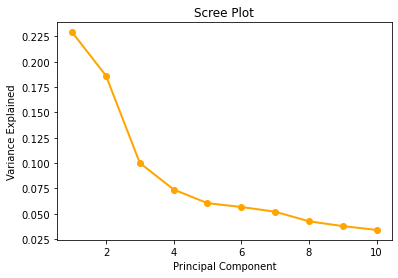

In [30]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='orange')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

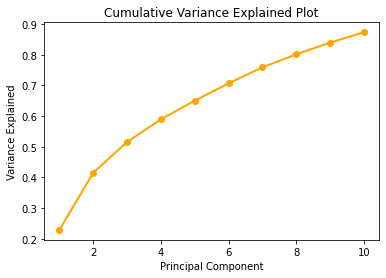

In [31]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'o-', linewidth=2, color='orange')
plt.title('Cumulative Variance Explained Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [36]:
#right PCA with 6 components

pca = PCA(n_components=6)
pca.fit(CID_data_copy)

PCA(n_components=6)

In [44]:
scores_pca=pca.transform(CID_data_copy)

In [45]:
scores_pca

array([[-0.52010493, -0.61624157,  0.3372304 ,  1.4651807 , -1.29540777,
         0.90775974],
       [ 2.61207723, 10.23230585, -1.58329481, -4.25639484, -1.00222639,
        -1.00778043],
       [-0.51735601, -0.48516093,  0.26497767,  1.77877441, -1.30520931,
         0.99344444],
       ...,
       [-0.55771233, -0.09290355, -1.07445714,  0.83300786,  1.07803673,
        -0.40494813],
       [-0.41120661, -0.49090414,  0.48642161,  1.3023079 ,  1.09650349,
        -0.11150375],
       [-0.15402904, -0.16983918,  1.09568091, -0.57743817,  1.14673321,
        -0.70345905]])

In [47]:
scores_pca.shape

(838768, 6)

### 2.3 Clustering!

In [49]:
import sys
import os
import json
from pyspark import SparkContext
from point import Point
import time

ModuleNotFoundError: No module named 'pyspark'

In [19]:

def init_centroids(dataset, k):
    start_time = time.time()
    initial_centroids = dataset.takeSample(False, k)
    print("init centroid execution:", len(initial_centroids), "in", (time.time() - start_time), "s")
    return initial_centroids

def assign_centroids(p):
    min_dist = float("inf")
    centroids = centroids_broadcast.value
    nearest_centroid = 0
    for i in range(len(centroids)):
        distance = p.distance(centroids[i], distance_broadcast.value)
        if(distance < min_dist):
            min_dist = distance
            nearest_centroid = i
    return (nearest_centroid, p)

def stopping_criterion(new_centroids, threshold):
    old_centroids = centroids_broadcast.value
    for i in range(len(old_centroids)):
        check = old_centroids[i].distance(new_centroids[i], distance_broadcast.value) <= threshold
        if check == False:
            return False
    return True

if _name_ == "_main_":
    start_time = time.time()
    if len(sys.argv) != 3:
        print("Number of arguments not valid!")
        sys.exit(1)

    with open('./config.json') as config:
        parameters = json.load(config)["configuration"][0]

    INPUT_PATH = str(sys.argv[1])
    OUTPUT_PATH = str(sys.argv[2])
    
    sc = SparkContext("yarn", "Kmeans")
    sc.setLogLevel("ERROR")
    sc.addPyFile("./point.py") ## It's necessary, otherwise the spark framework doesn't see point.py

    print("\n**START*\n")

    points = sc.textFile(INPUT_PATH).map(Point).cache()
    initial_centroids = init_centroids(points, k=parameters["k"])
    distance_broadcast = sc.broadcast(parameters["distance"])
    centroids_broadcast = sc.broadcast(initial_centroids)

    stop, n = False, 0
    while True:
        print("--Iteration n. {itr:d}".format(itr=n+1), end="\r", flush=True)
        cluster_assignment_rdd = points.map(assign_centroids)
        sum_rdd = cluster_assignment_rdd.reduceByKey(lambda x, y: x.sum(y))
        centroids_rdd = sum_rdd.mapValues(lambda x: x.get_average_point()).sortByKey(ascending=True)

        new_centroids = [item[1] for item in centroids_rdd.collect()]
        stop = stopping_criterion(new_centroids,parameters["threshold"])

        n += 1
        if(stop == False and n < parameters["maxiteration"]):
            centroids_broadcast = sc.broadcast(new_centroids)
        else:
            break

    with open(OUTPUT_PATH, "w") as f:
        for centroid in new_centroids:
            f.write(str(centroid) + "\n")

    execution_time = time.time() - start_time
    print("\nexecution time:", execution_time, "s")
    print("average time per iteration:", execution_time/n, "s")
    print("n_iter:", n)

1.11.0


### 2.4 Analysing your results!

## Bonus

Think about any two other clustering algorithms that you would like to use for the dataset (of course, you can use implemented version of them, e.g. from the scikit-learn library). Compare the results of chosen two algorithms with K-means implemented by you and K-means++ (from the scikit-learn library). Explain the differences (if there are any) in the results. Which one is the best, in your opinion, and why?

## Algorithmic Question

In [ ]:
entry,n_studs,n_guards= list(map(int,input().split()))

students  = list(map(int,input().split()))

guards = 1
for i in range(1,n_studs) :
    if(students[i] != students[i-1] and students[i] not in students[:i]):
        if(students[i-1] in students[i:]):
            guards += 1

print( 'Yes' if guards <= n_guards else 'No')